# Week 4 Bonus Material: Julia Sets. 


<div class="alert alert-warning">

**For enthusiasts - this material is entirely optional - you do not need to study it**

Below is a bonus question on Julia Sets.  It is not assessed. 

(For later in TB1...) If you are doing the **Recursive animations and Towers of Hanoi** group project you will find it useful to work through and solve this question. 

Model solutions are not provided but **Recursive animations and Towers of Hanoi** project students are encouraged to come and discuss their solution with me (the project supervisor) Charles Harris. 

</div>

## Bonus Question: Julia Sets

Suppose  that $j_p$ is some (fixed) complex number. We define  the **Julia set with parameter $j_p$** to be  the set of values $c$ in the complex plane such that the sequence $(z_n)_{n \ge 0}$ defined by the recurrence relation 

$$
z_0 = c  \quad \text{and} \quad z_n = z_{n-1}^2 + j_p, \quad \text{for } n = 1,2,3,\dots
$$

is bounded. We say that $(z_n)_{n \ge 0}$ is the  *Julia sequence with parameter $j_p$ induced by* $c$. (It would be more correct to write it as, for example $\big(z^{j_p,c}_n\big)_{n \ge 0}$ to explicitly show the dependence on the paramater $j_p$ and the number  $c$. However this would clutter our notation.) 

**Reminder 1.** $(z_n)_{n \ge 0}$ being bounded means that, for some natural number (or positive real number) $N$, $|z_n| \le N$ for all $n \ge 0$. 


Note that the above definition means that, given complex number $c$ the Julia sequence $(z_n)_{n \ge 0}$ with parameter $j_p$ induced by $c$  starts as: $z_0 = c$, $z_1 = c^2 + j_p$, $z_2 = (c^2 + j_p)^2 + j_p$, $z_3 = ((c^2 + j_p)^2 + j_p)^2 + j_p$, etc. 

**Note 1.** We know that, for given parameter $j_p$ and complex number $c$ the Julia sequence $(z_n)_{n \ge 0}$ with parameter $j_p$ induced by $c$  diverges to infinity - i.e. is NOT bounded - precisely in the case when $|z_n| > R$ for some $n$, where $R$ is the positive root of the quadratic equation 

$$
r^2 - r - |j_p| = 0 \,.
$$ 

(Since this is equivalent to saying that $(|z_n|)_{n \ge 0}$ is bounded below by a geometric series with common ratio greater than $1$.)
Moreover, in general, when $(z_n)_{n \ge 0}$ does diverge, we are able to find some small $n$ such  that $|z_n| > R$.  Thus we can compute a good guess as to whether $c$ is in the Julia set with parameter $j_p$ or not by inspecting some fixed number of initial terms of the Julia sequence $(z_n)_{n \ge 0}$ with parametr $j_p$ induced by $c$, whatever the value of $c$. 

**Note 2.** If $|c| > R$ (with $j_p$ and $R$ defined as in Note 1) then $|z_0| > R$ and so the sequence $(z_n)_{n \ge 0}$ with parameter $j_p$ induced by $c$ diverges (whatever the value of the fixed parameter $j_p$). Thus the only region of the plane of interest to us lies within the  $2R \times 2R$ square of the Complex Plane centred at 0 (with $R + Ri$ as top right corner etc.). 

**Reminder 2.** The complex number number $z = a + bi$ is represented as `a` $+$ `b*1j` in python. I.e. in python the $\sqrt{-1}$ is represented by `1j`. Remember also that $|z| := \sqrt{a^2 + b^2}$ and can be computed in python using `abs(z)`.

**Advice.** You should make sure that you understand the difference between the definition of Julia Sets and the Mandelbrot Set that we studied in the Tutorial of Week 4. Also, being conversant with the Tutorial exercises will help you here. 

<div class="alert alert-success">

### Given function: the Julia map 
</div> 
As with the Mandelbrot sequences it turns out that, given any complex number $c$, inspection of the initial segment $(z_0,z_1,\dots, z_{99})$ comprising the first $100$ terms of the Julia sequence with parameter $j_p$ induced by $c$, gives us a  good guess as to whether or not $c$ does lie in the Julia set with parameter $j_p$ or not. 

Here we mean of course that   we guess that $c$ is in the Julia set with paramter $j_p$  if and only if  it is NOT the case that $|z_n| > R$ for some $n < 100$ (where $R$ is defined, as above, to be  the positive root of $r^2 - r - |j_p| = 0$). 

Moreover, as with our work on the Mandelbrot set,  when we implement the functions and code to draw Julia sets we need to assume a fixed number of iterations throughout our code. Accordingly here we again choose to use $100$ for this value. As explained in the Tutorial of Week 4 it makes sense to define a global variable which we assign to the maximum number of iterations of $(z_n)_{n \ge 0}$ that we want to use. This we now do using the value $100$ in the cell below (which you should run). 


In [2]:
import numpy as np
import matplotlib.pyplot as plt 

MAXITER = 100

You are given the function  `julia(j_p,c)` which, supposing that $(z_n)_{n \ge 0}$ denotes the Julia sequence with parameter `j_p` induced by `c`, returns the least $n < $ `MAXITER` such that   $|z_n| > R$  (with $R$ the positive root defined above) if such an $n$ exists. Otherwise this function  returns the number `MAXITER`.  

In [3]:
def julia(j_p,c):
    # Global variable used: MAXITER
    # R is +ve root of r^2 - r - |j_p| = 0
    R = (1 + (1 + 4 * abs(j_p))**0.5 ) / 2.0 
    # n is used for the number of steps/iterations 
    n = 0 
    # z starts life as z_0 = c
    z = c
    # Compute z = z_n at each iteration and continue for as long 
    # as the sequence (z_n) does not start to diverge and n < MAXITER
    while abs(z) <= R and n < MAXITER: 
        z = z**2 + j_p
        n += 1
    # Then return the first n such that we escape the threshold R (or else n = MAXITER)
    return n 

In [4]:
# TESTING AREA: USE THIS CELL TO TEST THE GIVEN julia FUNCTION 
# SOME CHECKS ARE GIVEN BELOW
j_par = 0.7885*np.exp(1.67*1j)
c1, c2, c3 = 0.2647 + 0.2957*1j, 0.1106 + 0.1693*1j, 0.1861 + 0.3182*1j
n1, n2, n3 = julia(j_par,c1), julia(j_par,c2), julia(j_par,c3)
# Result should be n1 = 15, n2 = 100, n3 = 8
print("n1 n2 n3 =", n1, n2, n3)

n1 n2 n3 = 15 100 8


### Part 1: a function to create Julia sets (2 Pts)

You should now  design a function `make_julia_data` which has four input parameters. Its definition is of the form
```python
def make_julia_data(j_p, cd_min, cd_max, num_cds) 
    # Body of the function
```
where `j_p` is a complex number representing a  Julia set parameter and the pair `cd_min`, `cd_max` are real numbers to be used as end points of both an interval of $x$ coordinates and an interval of $y$ coordinates $-$ so representing between them the square region of the plane `[cd_min,cd_max]` $\times$ `[cd_min,cd_max]`. Also `num_cds` is an integer to be used as  the number of equally spaced $x$ coordinates and the number of equally spaced $y$ coordinates that we specify over this square region of the plane.

Similarly to the function `make_mandelbrot_data` from the Tutorial of Week 4 the object of your function `make_julia_data` is to first create a matrix of $x$ coordinates `x_matrix` and a matrix of $y$ coordinates `y_matrix` representing, as usual, a grid of two dimensional coordinates of the same dimensions for the square region `[cd_min,cd_max]` $\times$ `[cd_min,cd_max]` of the plane. Here (similarly to the Tutorial of Week 4) the coordinates are thought of as being in the complex plane.  Your function then creates a matrix of the same dimensions `n_matrix` which it populates with the result of function calls of the form `julia(j_p,c)` for every  complex number `c` represented in this grid.

- In more detail, supposing that `x_matrix` is the $d \times d$ matrix $(x_{kl})$ and `y_matrix` is the $d \times d$ matrix $(y_{kl})$, then `n_matrix` will be the $d \times d$ matrix $(n_{kl})$ where, for each $k,l$, $n_{kl}$ is the result of the computation of the function `julia` called with the Julia set parameter `j_p` as first input and the number $c_{kl} := x_{kl} + y_{kl}i$ as second input. 

**Remark.** You should notice that the $d$ in the dimension of the grid matrices actually corresponds to the number of coordinates in both the $x$ and the $y$ directions. I.e. $d$ = `num_cds`.

Your function  should **return** the 3-tuple (`x_matrix`, `y_matrix`, `n_matrix`). 

In [5]:
# VERSION 1
def make_julia_data(j_p, cd_min, cd_max, num_cds): 
    ### BEGIN SOLUTION
    # Global variable used (inside the call to julia): MAXITER
    # First construct  x and y vectors, this time using the 
    x_vector = np.linspace(cd_min,cd_max,num_cds)
    y_vector = np.linspace(cd_min,cd_max,num_cds)

    # We transform  x_vector and y_vector into matrices that together represent a grid of coordinates
    x_matrix, y_matrix = np.meshgrid(x_vector,y_vector)

    # We create a zero matrix "n_matrix" of the same dimensions as x_matrix and y_matrix  
    rows, cols = np.shape(x_matrix)
    n_matrix = np.zeros((rows,cols), dtype=int) # Neat using dtype=int, but no need for this
    
    # We now populate n_matrix with the values computed from the grid using the function julia
    for i in range(rows):
        for k in range(cols):
            n_matrix[i,k] = julia(j_p, x_matrix[i,k] + y_matrix[i,k]*1j)
    return x_matrix, y_matrix, n_matrix
    ### END SOLUTION

In [6]:
# VERSION 2
## Start by making julia numpy array compatible
julia_np = np.vectorize(julia) 

def make_julia_data(j_p, cd_min, cd_max, num_cds): 
    ### BEGIN SOLUTION
    # Global variable used (inside the call to julia): MAXITER
    # First construct  x and y vectors, this time using the 
    x_vector = np.linspace(cd_min,cd_max,num_cds)
    y_vector = np.linspace(cd_min,cd_max,num_cds)

    # We transform  x_vector and y_vector into matrices that together represent a grid of coordinates
    x_matrix, y_matrix = np.meshgrid(x_vector,y_vector)

    # We define n_matrix as the matrix containing the values computed from the grid using 
    # the function julia_np (which computes using a matrix as input)
    n_matrix = julia_np(j_p, x_matrix + y_matrix*1j)
    return x_matrix, y_matrix, n_matrix

In [7]:
# TESTING AREA USE THIS CELL TO CHECK OR TEST YOUR CODE
J_PAR = -0.4 + 0.6*1j
x, y = -0.2, -0.2
julia(J_PAR, x + y*1j)

10

In [8]:
# TESTING CELL: YOUR FUNCTION SHOULD PASS THESE TESTS
def julia_test(a_matrix):
    # Global variable used: MAXITER
    # The input a_matrix is expected to have integer components in the interval 
    # [0,MAXITER]. julia_test returns a boolean matrix of the same dimensions in 
    # which the only components with value True correspond to the components of 
    # n_matrix with value MAXITER. All other components have value False
    return a_matrix == MAXITER
# TESTING STARTS HERE, WITH PRINTOUTS
MAXITER = 100 
J_PAR = -0.4 + 0.6*1j
NUM_CDS = 5
x_matrix1, y_matrix1, n_matrix1 = make_julia_data(J_PAR, -0.2, 0.2, NUM_CDS)
print("x_matrix1 =\n",x_matrix1)
print("y_matrix1 =\n",y_matrix1)
print("n_matrix1 =\n",n_matrix1)
n_matrix1_sol = np.array([[ 10,  14,  70,  40,  92],
                         [100,  18,  67,  30,  47],
                         [ 46,  23,  26,  23,  46],
                         [ 47,  30,  67,  18, 100],
                         [ 92,  40,  70,  14,  10]]) 
assert (julia_test(n_matrix1) == julia_test(n_matrix1_sol)).all()

### MORE TESTS
_J_PAR = -0.208 + 0.7885*1j
_NUM_CDS = 7
x_matrix2, y_matrix2, n_matrix2 = make_julia_data(_J_PAR, -0.6, 0.6, _NUM_CDS)
print("x_matrix2 =\n",x_matrix2)
print("y_matrix2 =\n",y_matrix2)
print("n_matrix2 =\n",n_matrix2)
n_matrix2_sol = \
np.array([[  2,   2,   3, 100,  75, 100, 100],
          [  2,   3,   5,   7,  12,  23,   9],
          [  2, 100,  10,  14, 100, 100,   5],
          [  4,   9, 100, 100, 100,   9,   4],
          [  5, 100, 100,  14,  10, 100,   2],
          [  9,  23,  12,   7,   5,   3,   2],
          [100, 100,  75, 100,   3,   2,   2]])
assert (julia_test(n_matrix2) == julia_test(n_matrix2_sol)).all()

### NOTE THE VERSION OF julia_test USED IN PREVIOUS YEARS
def julia_test_old(n_matrix):
    # Global variable used: MAXITER
    # The input n_matrix is expected to have integer components in the interval 
    # [0,MAXITER]. julia_test returns a boolean matrix of the same dimensions in 
    # which the only components with value True correspond to the components of 
    # n_matrix with value MAXITER. All other components have value False
    rows, cols = np.shape(n_matrix)
    julia_bool = np.full((rows,cols), False)
    for row in range(rows): 
        for col in range(cols): 
            if n_matrix[row][col] == MAXITER: 
                julia_bool[row][col] = True
    return julia_bool

x_matrix1 =
 [[-0.2 -0.1  0.   0.1  0.2]
 [-0.2 -0.1  0.   0.1  0.2]
 [-0.2 -0.1  0.   0.1  0.2]
 [-0.2 -0.1  0.   0.1  0.2]
 [-0.2 -0.1  0.   0.1  0.2]]
y_matrix1 =
 [[-0.2 -0.2 -0.2 -0.2 -0.2]
 [-0.1 -0.1 -0.1 -0.1 -0.1]
 [ 0.   0.   0.   0.   0. ]
 [ 0.1  0.1  0.1  0.1  0.1]
 [ 0.2  0.2  0.2  0.2  0.2]]
n_matrix1 =
 [[ 10  12  69  38  92]
 [100  17  66  30  45]
 [ 46  22  25  22  46]
 [ 45  30  66  17 100]
 [ 92  38  69  12  10]]
x_matrix2 =
 [[-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]
 [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]
 [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]
 [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]
 [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]
 [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]
 [-0.6 -0.4 -0.2  0.   0.2  0.4  0.6]]
y_matrix2 =
 [[-0.6 -0.6 -0.6 -0.6 -0.6 -0.6 -0.6]
 [-0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4]
 [-0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.4  0.4  0.4  0.4  0.4  0.4  0.4]
 [ 0.6  0.6  0.6  0.6  0.6  0.6  0.6]]
n_m

### Part 2: Plot four different Julia Sets

Similarly to the function `make_mandelbrot_data` of the Tutorial of Week 4 `make_julia_data`  returns three numpy arrays of the type that the pyplot pixellated plotting function `pcolor` takes as its first three input arguments. The matrices/arrays returned correspond respectively to the $x$, $y$ and $z$ coordinates in 3 dimensions where, for each point $(x,y,z)$,  the coordinate $z$ is the  integer returned by the function `julia` with inputs $j_p$ and $c := x +iy$ where $j_p$ is the Julia set parameter passed as an argument to `make_julia_data`. Remember that $c$ is (or, more precisely, we guess that it is)  in the Julia set with paramater $j_p$ if $z =$ `MAXITER` and $c$ is not in the set otherwise (i.e. if $z <$ `MAXITER`). The function `pcolor` calibrates the colours of each point $c$ in the complex plane (or at least in our grid) according to the size of $z$  and hence we can see for each point if it is either  in the Julia set  or otherwise "how far out" of, the Julia set it is according to the colour attributed to it. 

Your task here is to plot four Julia sets each derived using a different parameter $j_p$. You will arrange your plots into a square grid of 4 subplots, just as we did for functions $f$, $g$, $h$ and $k$ in section "Multiple individual subplots in one Figure" in Lecture 4.2.  The details for this are as follows. 
- The overall figure size should be given by setting the parameter `figsize` of the `plt.figure` function to (14,12). 
- Each subplot should cover precisely the square region of the  plane corresponding to  $[-2,2] \times [-2,2]$ (as this suffices here). 
- The number of coordinates used should be the same for each subplot. You should set this to 200 $-$ for example set variable `NUM_CD = 200` and use `NUM_CD` as (the last) input to the function `make_julia_data` when preparing the grid data for each subplot.
- To define the colour limits (for every subplot)  you should set `vmin = 0` and `vmax = MAXITER`
- Each subplot should have a colorbar associated with it. It should also have a title that includes the Julia set parameter and the colormap used. (You do not need to, and should not, label the axes as this would clutter your output.)

The four subplots should be as follows. 
1. *Top left.* The Julia Set with parameter $j_p = 0.7885 \cdot e^{3.05i}$, plotted using the colormap `'plasma'`. 
2. *Top right.* The Julia Set with parameter $j_p = 0.7885 \cdot e^{2.25i}$, plotted using the colormap `'magma'`. 
3. *Bottom left.* The Julia Set with parameter $j_p = 0.7885 \cdot e^{4.5i}$, plotted using the colormap `'viridis'`. 
4. *Bottom right.* The Julia Set with parameter $j_p = 0.7885 \cdot e^{2.29i}$, plotted using the colormap `'inferno'`. 

For each of these subplots you should first generate the grid data for the plot using your function `make_julia_data` with appropriate arguments (in the same way that we used `make_mandelbrot_data` in the Tutorial of Week 4). 

**Note 1.** Setting the number of coordinates `NUM_CDS` used to 200 allows the plot to be computed within 6 seconds. To get higher resolution you can set this to 400 for example. However in the final version that you submit for grading make sure that the number of coordinates is set to 200 and NOT more. (In order to ensure that the automatic grader does not fail due to time-out on this question.) 

**Note 2.** You must use the Julia set parameter and colormap for each subplot prescribed above. (The colormaps were chosen from those listed on <a href="https://matplotlib.org/stable/gallery/color/colormap_reference.html">https://matplotlib.org/stable/gallery/color/colormap_reference.html</a> ). 

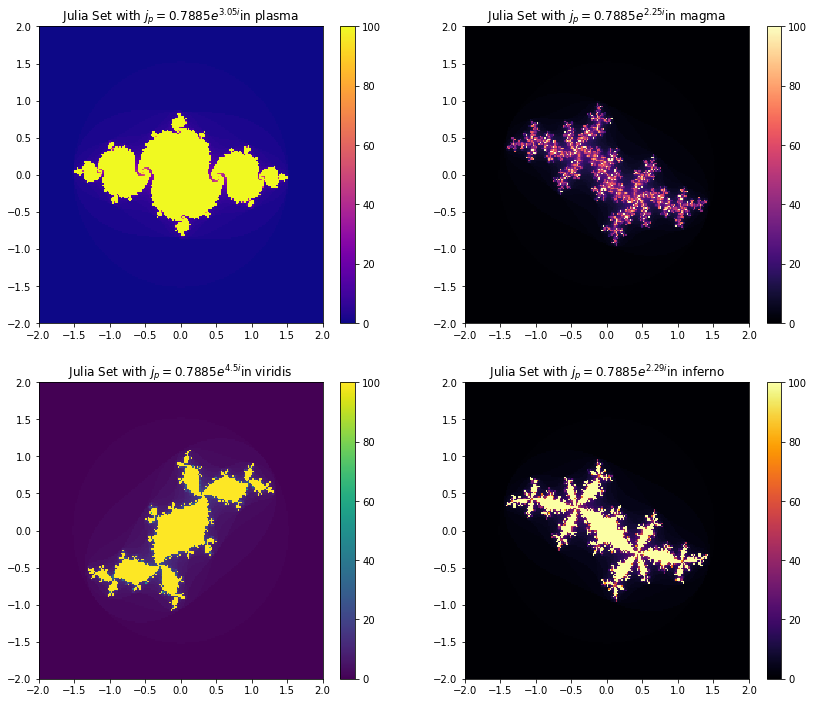

In [9]:
MAXITER = 100
NUM_CDS = 200

jp_base = 0.7885
exponents = [3.05j, 2.25j, 4.5j, 2.29j]

# Parameters, colourmaps and titles for the plots
jp_values = [jp_base * np.exp(e) for e in exponents]
colormaps = ['plasma', 'magma', 'viridis', 'inferno']
titles = ['Julia Set with $j_p = 0.7885e^{3.05i}$', 
          'Julia Set with $j_p = 0.7885e^{2.25i}$', 
          'Julia Set with $j_p = 0.7885e^{4.5i}$', 
          'Julia Set with $j_p = 0.7885e^{2.29i}$']

# Create a new figure
plt.figure(figsize=(14,12))

# Create 4 subplots in a square format  
for i in range(4):
    plt.subplot(221 + i)
    x_matrix, y_matrix, n_matrix1 = make_julia_data(jp_values[i], -2, 2, NUM_CDS)
    plt.pcolor(x_matrix, y_matrix, n_matrix1, cmap=colormaps[i], vmin = 0, vmax = MAXITER)    
    plt.colorbar()
    plt.title(titles[i] + f"in {colormaps[i]}")
    
plt.show()